## My name is Pratham Sharda 

## Roll no.22110203

## This is pre requisite Exam of ES 335

Firstly let's import all important and necessary libraries


In [2]:
# importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import jax
import jax.numpy as jnp
from jax import grad
import sympy as sp

# to see plots in notebook
%matplotlib inline  

# Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



Number of multiplications needed=n X m X k
Number of additions needed=n X m X (k-1)

### Explanation:
It is necessary to multiply each row of matrix 1 by each column of matrix 2, resulting in nxm total operations that match up to nxm final matrices. We require k multiplications for each of these operations (k elements in a row of matrix 1 multiplied by k elements in a column of matrix 2). We thus have nxmxk multiplications for nxm operations.

We need to add k-1 times the multiplied numbers in order to add them all in one operation. We thus have nxmx(k-1) additions for nxm operations.

# Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
#let us choose the dimention as follows

n=200
m=400
k=300

a=np.random.randint(1,10,(n,k))
b=np.random.randint(1,10,(k,m))
c=np.zeros((n,m))
li_a=list(a)
li_b=list(b)
li_c=list(c)

print(type(a))
print()
print(type(li_a))

<class 'numpy.ndarray'>

<class 'list'>


In [4]:
#Using loops

tic=time.time()

for i in range(0,n):
    for j in range(0,m):
        curr_ele=0
        for y in range(0,k):
            curr_ele+=li_a[i][y]*li_b[y][j]
        li_c[i][j]=curr_ele
toc=time.time()


taken=tic-toc 

print(-taken)
            
            

10.050432443618774


In [5]:
#Using numpy


tic=time.time()
np.matmul(a,b)
toc=time.time()

print(toc-tic)




0.0535736083984375


So as we can see Numpy multiplication is much faster than loops 
According to what i read ,numpy is implimented with an underlying high level language such as C and C++ which are way faster than python language because in those languages datatype is already defined thus they don't have to worry about the type of data before performing the operation .

# Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

So when we try to find the median using the method mentioned above its time complexity would be O(n**2)
 
this is because every time we have to traverse n elements and we have to do this untill we reach at median which is at n/2 position from ends,thus it would become n+(n-1)+(n-2)......+n/2  which becomes O(n**2)

So a better method would be to use some sorting algorithms or the inbuilt python sort function which sorts the array in time complexity of O(nlogn) and then find out the mid most elementto get the median from the sorted array

In [26]:
#using the given method mentioned above
temp=list(np.random.randint(100, size=(5000,1)))
tic=time.time()
def findmax(arr):
    max=-10000
    index=-1
    for i in range(len(arr)):
        if arr[i]>max:
            index=i
            max=arr[i]
            
    return index



length=len(temp)
alpha=temp
while(len(alpha)>(length/2)):
    i=findmax(alpha)
    med=alpha[i]

    alpha=alpha[:i]+alpha[i+1:]
    
# print(med,i) 
print("median is")
if len(temp)%2==0:
    print((temp[i]+temp[i-1])/2)
else:
    print(temp[i])

toc=time.time()

print(toc-tic)

median is
[29.5]
4.594501256942749


In [7]:
#using sorting

temp=list(np.random.randint(100, size=(5000)))
tic=time.time()
temp.sort()
n=len(temp)
# print(n/2)
print("median is")
if len(temp)%2==0:
    print((temp[int(n/2)]+temp[int(n/2)-1])/2)
else:
    print(temp[int(n/2)])

toc=time.time()

print(toc-tic)

median is
48.0
0.0


In [8]:
temp=list(np.random.randint(100, size=(5000)))
tic=time.time()
print('median is')
print(np.median(temp))
toc=time.time()

print(toc-tic)


median is
49.0
0.002895832061767578


# Q4. What is the gradient of the following function with respect to x and y?
#        x^2y+y^3sin(x)

Gradient w.r.t. x:
2*x*y + (y**3)*cosx

Gradient w.r.t. y: x**2 + 3(y **2)sinx

# Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [25]:
def f(x, y):
    return x*x*y + y*y*y*jnp.sin(x)

def dx(x,y):
    return 2*x*y + y*y*y*jnp.cos(x)

def dy(x,y):
    return x*x + 3*y*y*jnp.sin(x)

dx_jax=jax.grad(f, argnums=0)
dy_jax=jax.grad(f, argnums=1)

x=1.0
y=2.0

diff_using_x=dx_jax(x,y)
diff_using_y=dy_jax(x,y)
diff_using_funx=dx(x,y)
diff_using_funy=dy(x,y)

print(diff_using_x)
print(diff_using_funx)
print(diff_using_y)
print(diff_using_funy)

8.322418
8.322418
11.0976515
11.0976515


# Q6.  Use sympy to confirm that you obtain the same gradient analytically.

In [9]:
x, y = sp.symbols('x y')

f = (x**2)*y + (y**3)*sp.sin(x)    

# finding derivative
d_dx = sp.diff(f, x)
d_dy = sp.diff(f, y)

print('The gradient with respect to x is', d_dx)
print('The gradient with respect to y is', d_dy)

The gradient with respect to x is 2*x*y + y**3*cos(x)
The gradient with respect to y is x**2 + 3*y**2*sin(x)


So as we see here the gradient is same as what we found analytically 

# Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [1]:
dictionary = {
    2022:
        {
            "Branch1":
                {
                    "Roll Number": 1,
                    
                    "Name": "N",
                    
                    "Marks": {"Maths": 100, "English": 70}
                },
            "Branch2": {}
        },
    2023: {"Branch1": {}, "Branch2": {}},
    2024: {"Branch1": {}, "Branch2": {}},
    2025: {"Branch1": {}, "Branch2": {}}
    }

print(dictionary[2022])




{'Branch1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch2': {}}


# Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

# Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



In [10]:
x=np.arange(0.5,100.5,0.5)


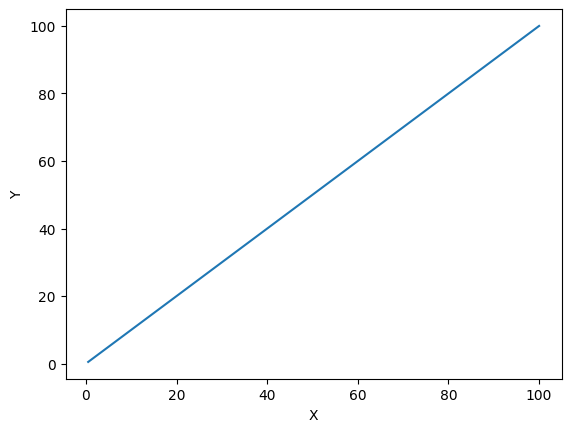

In [11]:
#1

y = x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

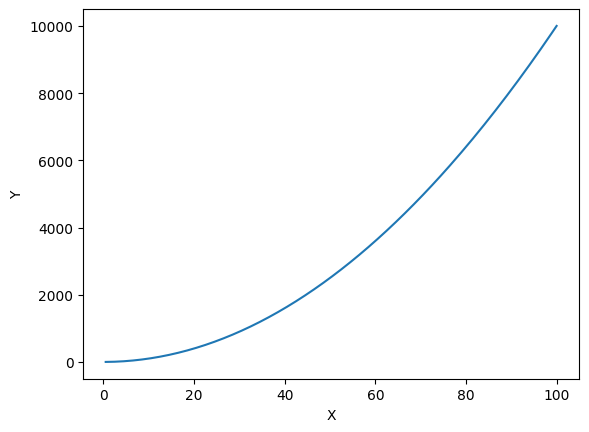

In [12]:
#2
y = x**2

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

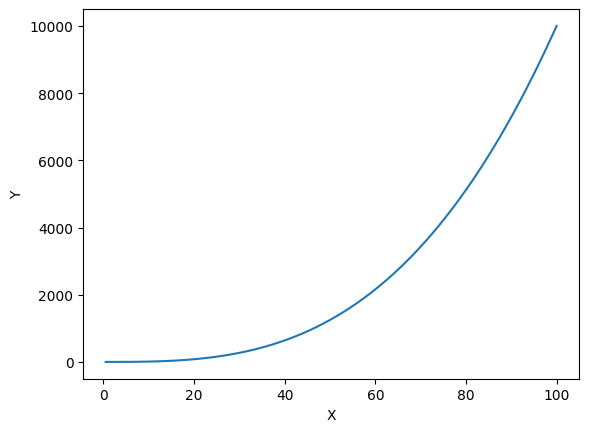

In [13]:
#3
y = x**3/100

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

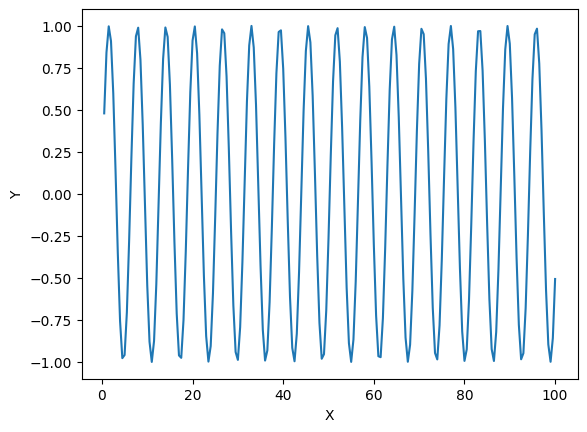

In [14]:
#4
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

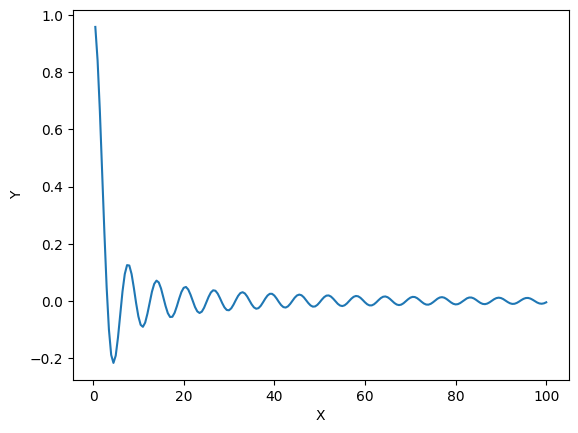

In [15]:
#5
y = np.sin(x)/x

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

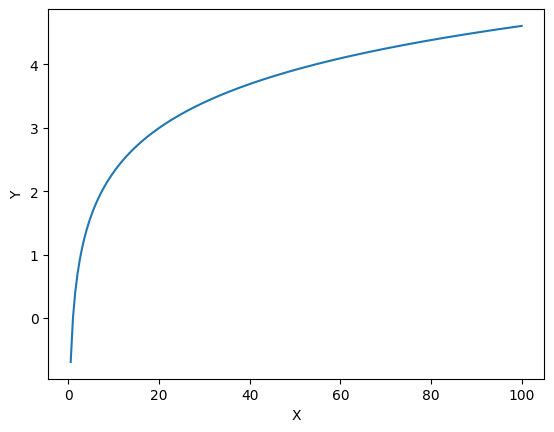

In [16]:
#6

y = np.log(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

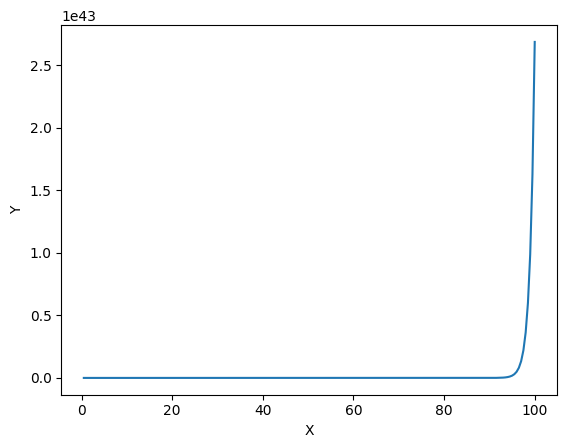

In [22]:
#7 e to the power x graph

y = np.exp(x)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [18]:
r_arr=np.random.uniform(low=1,high=2,size=(20,5))
df=pd.DataFrame(r_arr)
df.columns=['a','b','c','d','e']
print(df)
print()
print(df.std())
print()
print('The index of column haveing highest standard deviation is',np.argmax(df.std()))
print()
print('The index of row having lowest mean is',np.argmin(df.mean(axis=1)))


           a         b         c         d         e
0   1.708817  1.997215  1.946508  1.553074  1.832326
1   1.068708  1.856244  1.880436  1.831949  1.091487
2   1.042521  1.964702  1.442248  1.496747  1.151300
3   1.904090  1.151555  1.561315  1.619790  1.595541
4   1.806813  1.542502  1.583585  1.089551  1.967410
5   1.314238  1.731939  1.159274  1.138937  1.011504
6   1.067522  1.304545  1.446961  1.523528  1.537476
7   1.500333  1.741137  1.531951  1.454792  1.540397
8   1.655310  1.229392  1.656990  1.330274  1.375106
9   1.116779  1.673904  1.588333  1.253473  1.163967
10  1.382548  1.924850  1.136187  1.669093  1.630716
11  1.934437  1.712065  1.353403  1.889623  1.576846
12  1.375706  1.694248  1.909518  1.983999  1.701106
13  1.311879  1.427820  1.809237  1.017977  1.172825
14  1.040129  1.142962  1.467617  1.623960  1.743670
15  1.560169  1.022792  1.565179  1.161593  1.160604
16  1.201418  1.301249  1.131813  1.371582  1.656042
17  1.802632  1.889409  1.720616  1.577757  1.

# Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [19]:
df['f']=df.sum(axis=1)
print(df)
print()

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print(df)
print()
lt8_count = (df['g'] == 'LT8').sum()
print(lt8_count)
print()

lt8_std=df[df['g']=='LT8']['f'].std()
print(lt8_std)
print()

gt8_std=df[df['g']=='GT8']['f'].std()
print(gt8_std)
print()


           a         b         c         d         e         f
0   1.708817  1.997215  1.946508  1.553074  1.832326  9.037939
1   1.068708  1.856244  1.880436  1.831949  1.091487  7.728825
2   1.042521  1.964702  1.442248  1.496747  1.151300  7.097519
3   1.904090  1.151555  1.561315  1.619790  1.595541  7.832289
4   1.806813  1.542502  1.583585  1.089551  1.967410  7.989862
5   1.314238  1.731939  1.159274  1.138937  1.011504  6.355892
6   1.067522  1.304545  1.446961  1.523528  1.537476  6.880033
7   1.500333  1.741137  1.531951  1.454792  1.540397  7.768609
8   1.655310  1.229392  1.656990  1.330274  1.375106  7.247073
9   1.116779  1.673904  1.588333  1.253473  1.163967  6.796456
10  1.382548  1.924850  1.136187  1.669093  1.630716  7.743395
11  1.934437  1.712065  1.353403  1.889623  1.576846  8.466374
12  1.375706  1.694248  1.909518  1.983999  1.701106  8.664577
13  1.311879  1.427820  1.809237  1.017977  1.172825  6.739739
14  1.040129  1.142962  1.467617  1.623960  1.743670  7

# Q12. Write a small piece of code to explain broadcasting in numpy.

In [20]:

matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                  [10,11,12]])

row = np.array([10, 20, 30])


result = matrix + row

print("Original Matrix:")
print(matrix)
print()

print("Row Vector:")
print(row)
print()

print("Result after Broadcasting:")
print(result)


#so we can see in broad casting that when a 4x3 matrix is added with a row of dimention 1x3 then ALL THE CORRESPONDING elements 
# get added in each row of matrix
# This is known as BROADCASTING


Original Matrix:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Row Vector:
[10 20 30]

Result after Broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]
 [20 31 42]]


# Q13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [21]:
def compute_argmin(array):
    min_index = 0  
    min_value = array[0]

    for i in range(1, len(array)):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i

    return min_index


array=np.random.randint(1,100,15)

fun_min=compute_argmin(array)
auto_min=np.argmin(array)

if fun_min==auto_min:
    print("the answer obtained is same")
else:
    print('the answer obtained is not same')

the answer obtained is same
